# Baseball Case Study
Problem Statement:
    
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the 
number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, 
    Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

# Import Libraries

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')




In [2]:
#displating max_rows
pd.set_option('display.max_rows',None,'display.max_columns',None)

In [3]:
#importing the dataset

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [4]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [16]:
#checking the available rows and columns in the dataset
df.shape

(30, 17)

there are 30 rows and 17 columns in the dataset

In [19]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

we are able to observe all the columns except Earned Run Average(ERA) is float and rest of the columns are int data type

we are able to see the names of columns from problem statemnt

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [23]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

we are able to see that no null values in the dataset and all the rows contains nonnull values.lets visualize it 

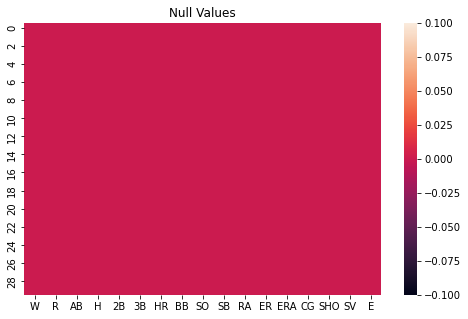

In [24]:
# heatmap on null values
plt.figure(figsize=[8,5])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

We are able to observe Zero null values and whitespaces in the dataset lets continues with it

In [25]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Statistics summary

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [ ]:
we can observe large std for all the columns in the datasets.lets visualize the data for more clarity

<AxesSubplot:>

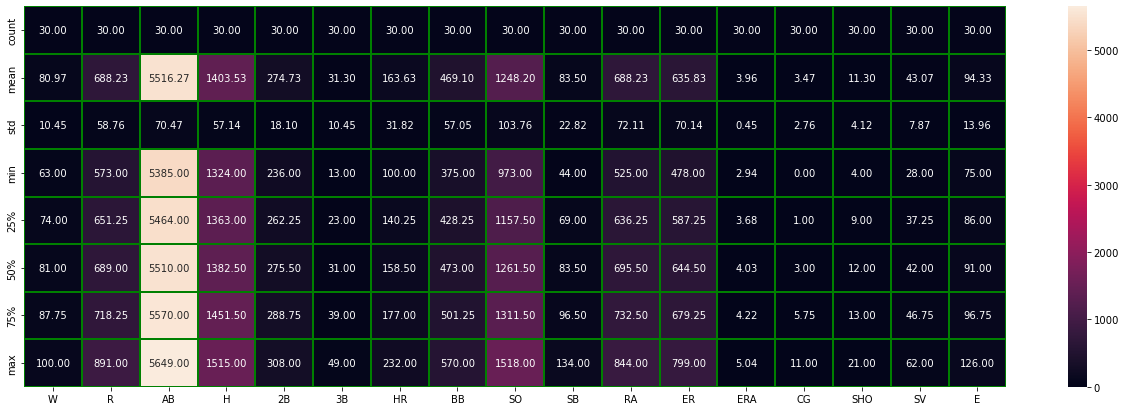

In [33]:
#lets see the plot in heat map 
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="green",fmt="0.2f")

the data looks good now to observe the data

# lets observe the  Output variable data as well

<AxesSubplot:xlabel='W', ylabel='count'>

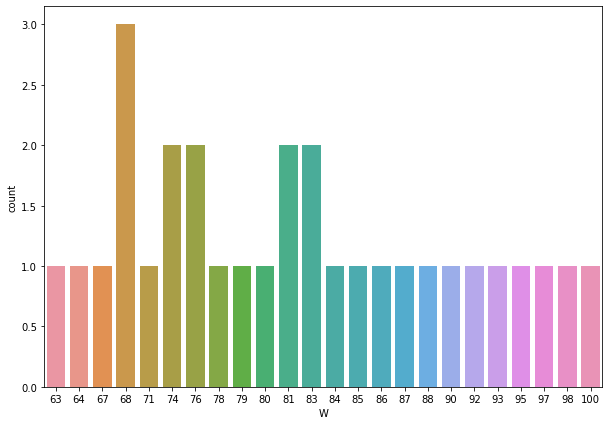

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(df.W)

we are able to observe that  2 teams has 81 wins and 83 wins.And 2 teams has 74 and 76 wins .3 team has 68 wins.

we can see the rest of the no team has more than same number of wins

In [39]:
#duplicates removal
df.drop_duplicates(inplace=True)
df.shape

(30, 17)

there are no duplicates in the dataset as the shape remains the same after checking for duplicate values

In [321]:
columns=df.columns
columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

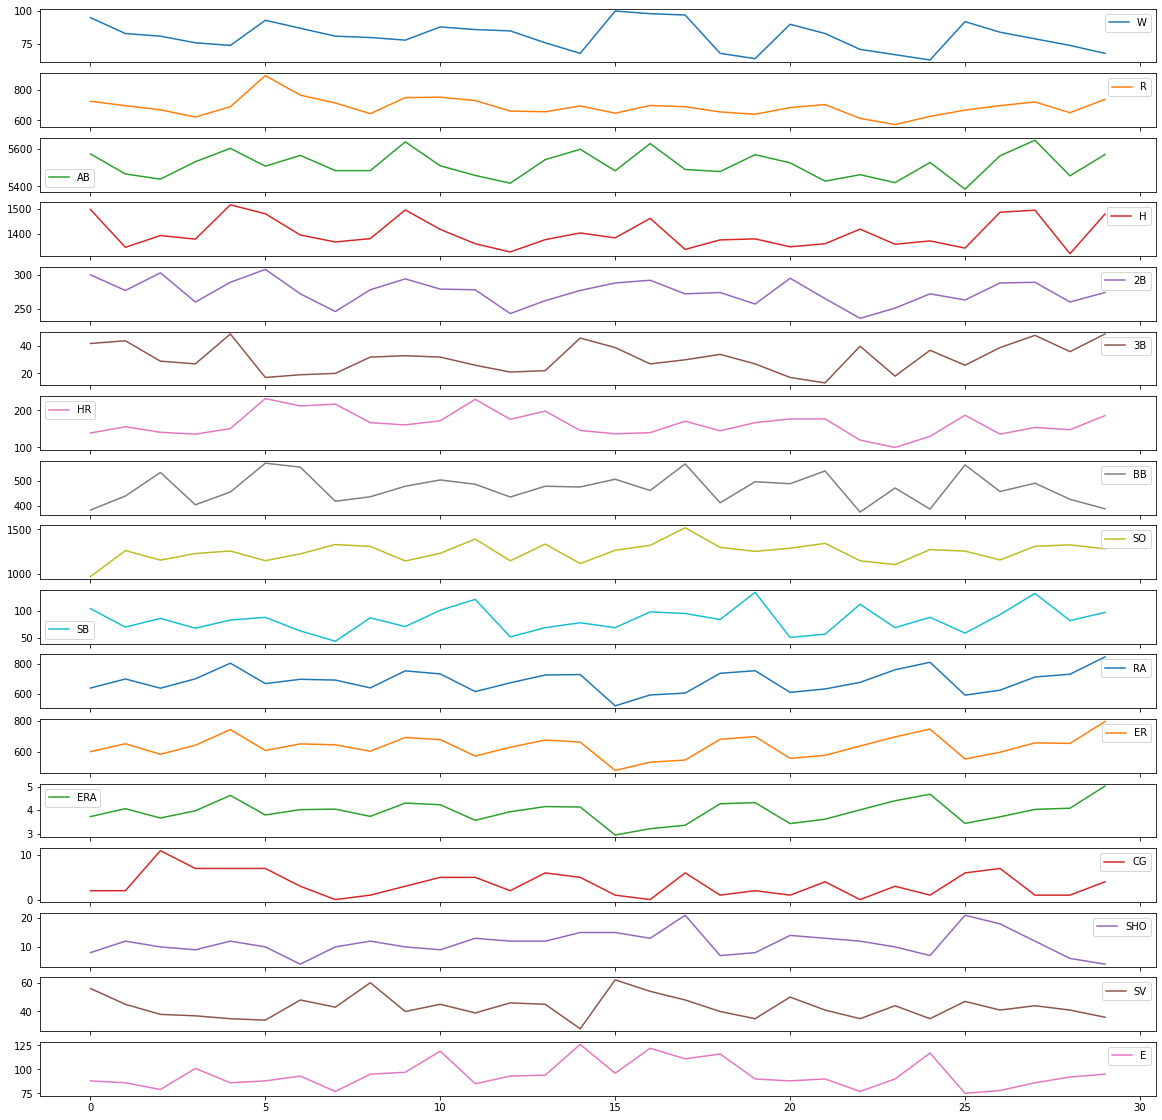

In [15]:
df.plot.line(subplots = True, figsize=(20,20))

# Checking distribution relationship

In [293]:
def pplot(i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,4,1)
    sns.histplot(x=columns[i],data=df,kde=True)
    plt.subplot(1,4,2)
    sns.regplot(x=columns[i],y='W',data=df)
    
    plt.subplot(1,4,3)
    df.groupby(columns[i]).size().plot(kind='pie', autopct='%.2f%%')
    
    plt.xlabel(columns[i])
    plt.show()

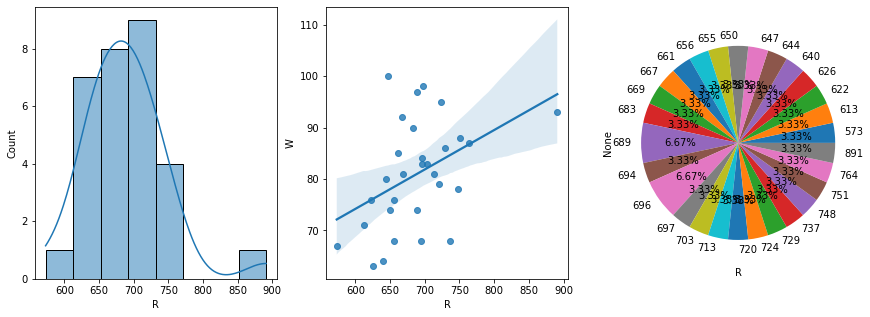

In [294]:
pplot(1)

In [301]:
df.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [304]:
def bar_plt(a):
    
    plt.figure(figsize=(10,10))
    sns.barplot(x=columns[a], y=df.W, data=df)
    plt.xlabel(columns[a])

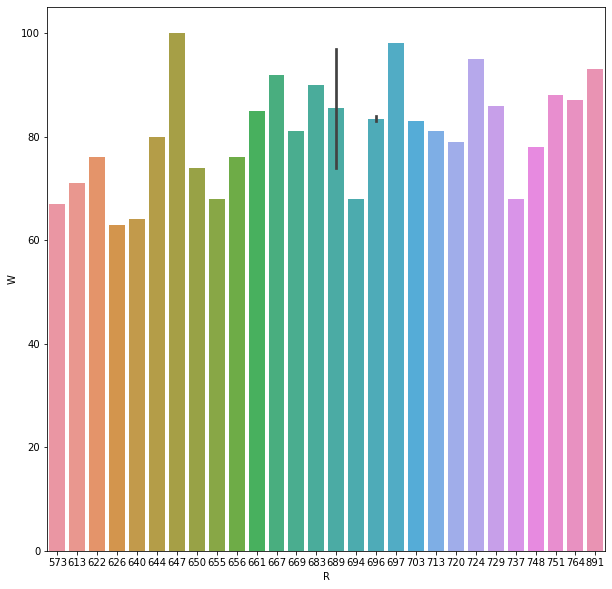

In [305]:
bar_plt(1)

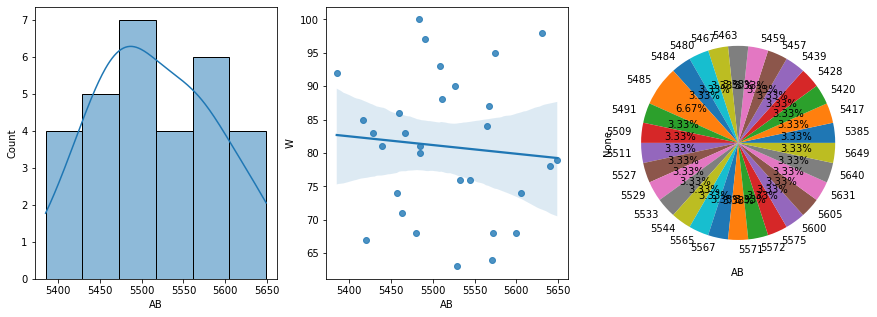

In [306]:
pplot(2)

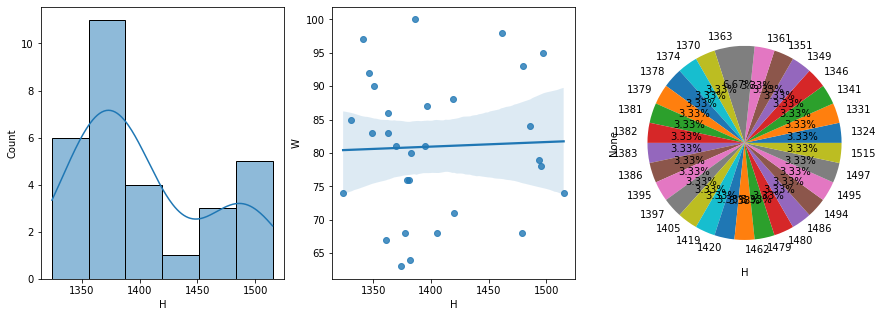

In [307]:
pplot(3)

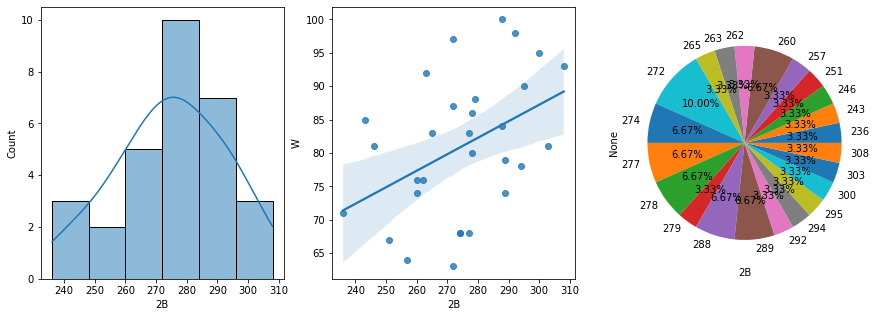

In [308]:
pplot(4)

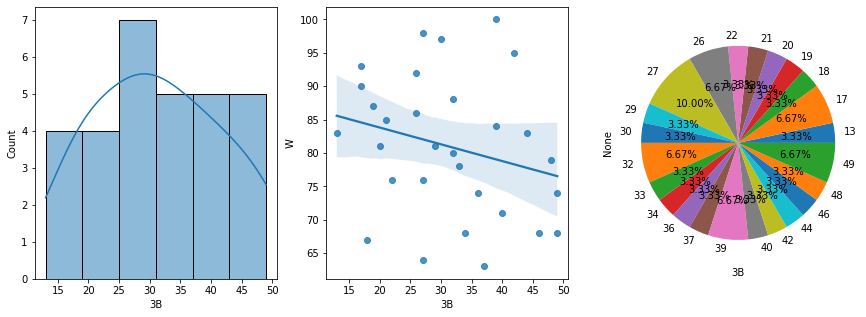

In [309]:
pplot(5)

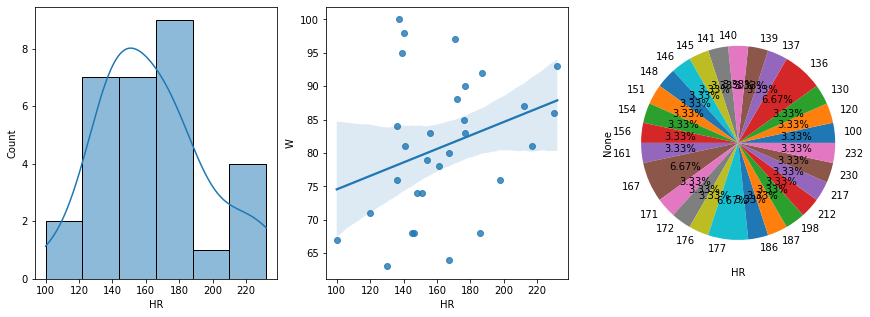

In [310]:
pplot(6)

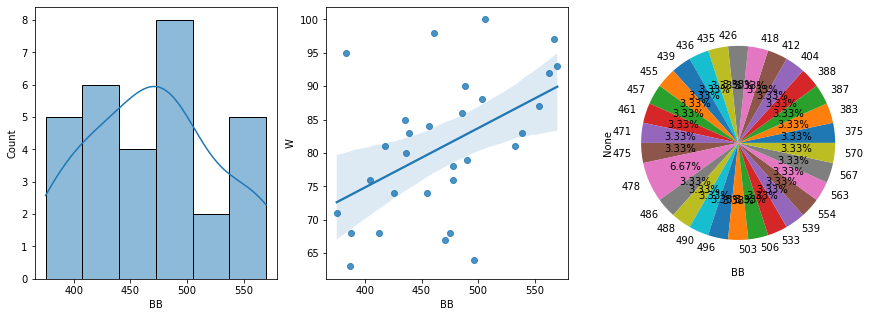

In [311]:
pplot(7)

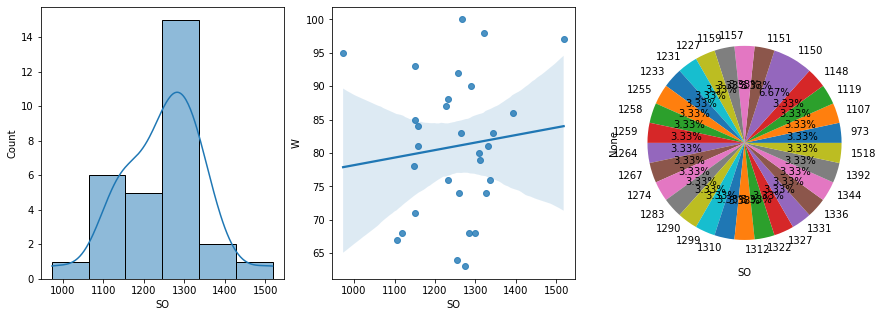

In [312]:
pplot(8)

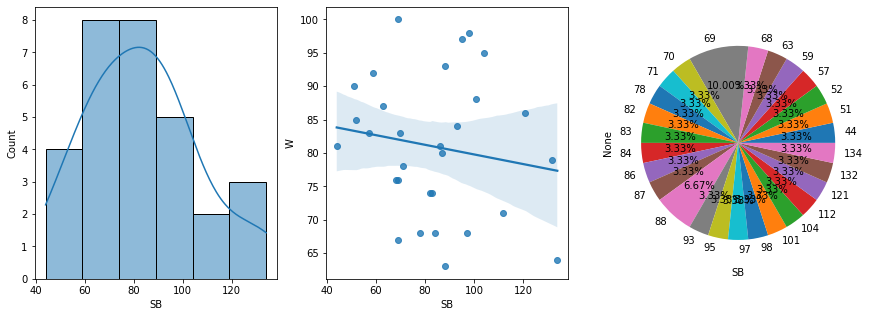

In [313]:
pplot(9)

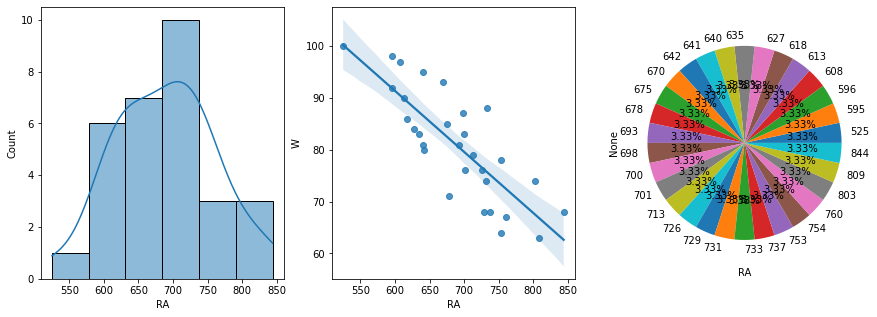

In [314]:
pplot(10)

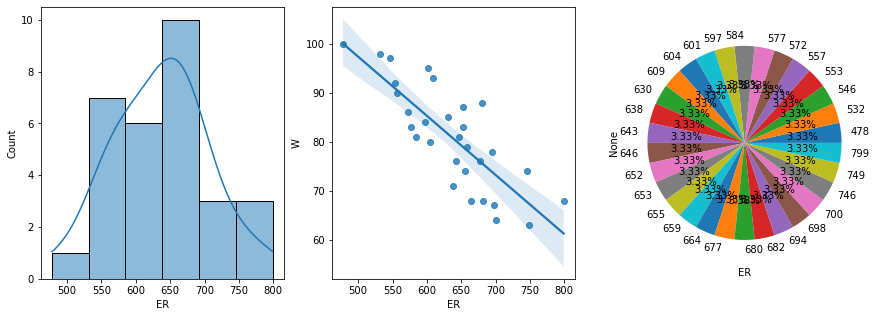

In [315]:
pplot(11)

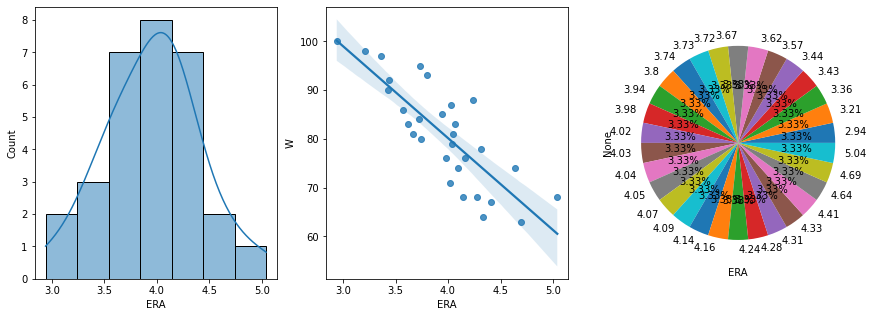

In [316]:
pplot(12)

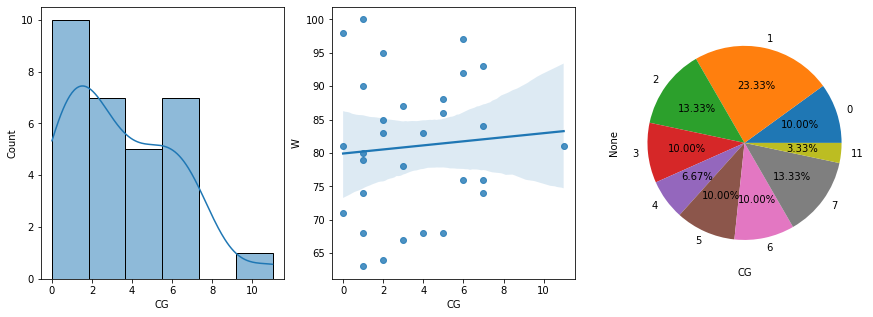

In [317]:
pplot(13)

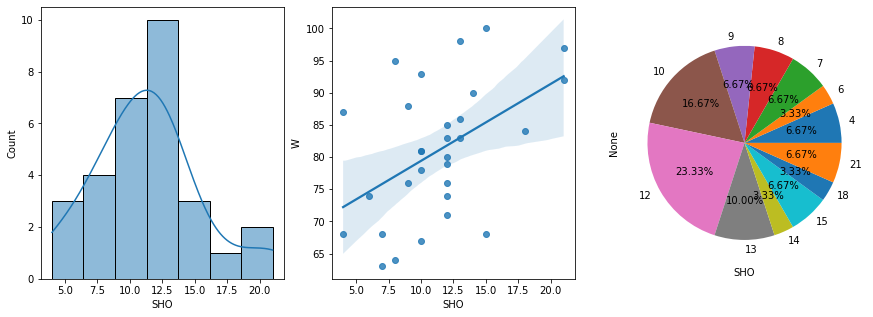

In [318]:
pplot(14)

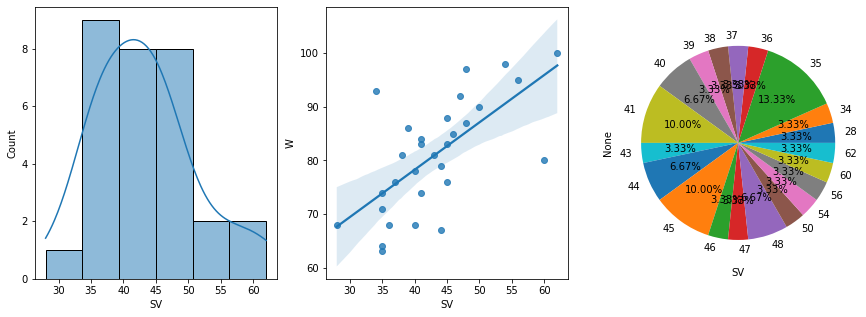

In [319]:
pplot(15)

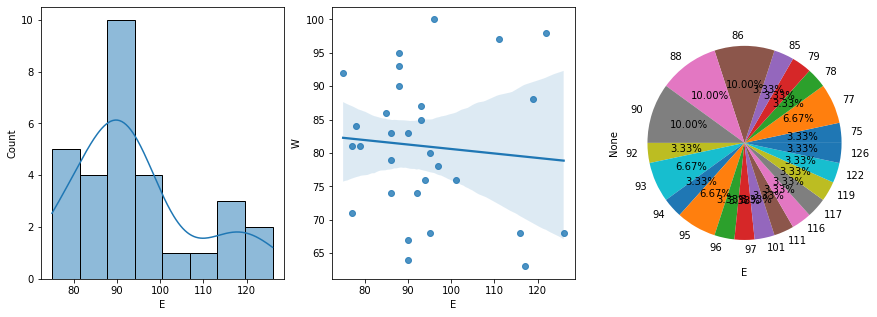

In [320]:
pplot(16)

# joint plot

In [269]:

#relationship for each feature name with the output

#defining the function 
def joint_plot(a):
    plt.figure()
    
    sns.jointplot(df[columns[a]],y=df['W'],color='green')

<Figure size 432x288 with 0 Axes>

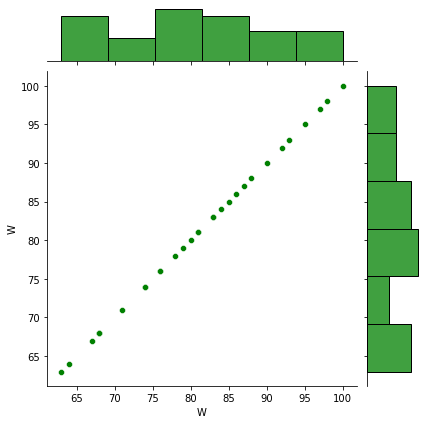

In [271]:
joint_plot(0)

<Figure size 432x288 with 0 Axes>

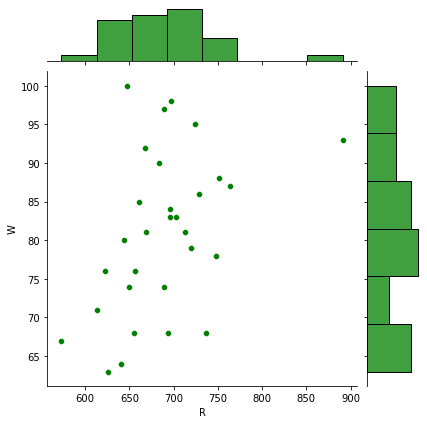

In [272]:
joint_plot(1)

<Figure size 432x288 with 0 Axes>

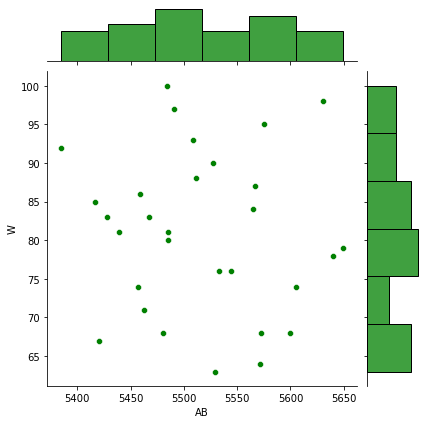

In [273]:
joint_plot(2)

<Figure size 432x288 with 0 Axes>

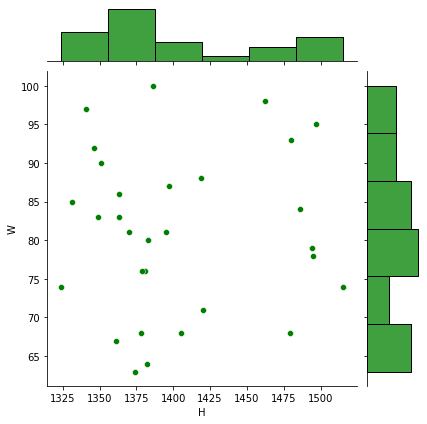

In [274]:
joint_plot(3)

<Figure size 432x288 with 0 Axes>

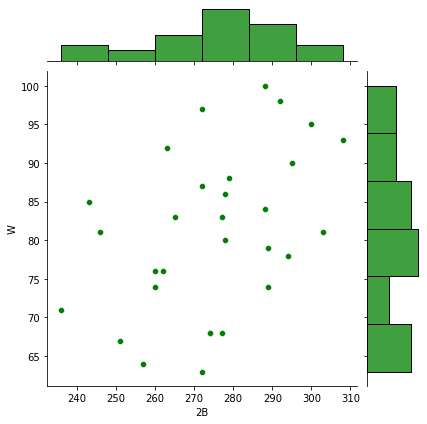

In [275]:
joint_plot(4)

<Figure size 432x288 with 0 Axes>

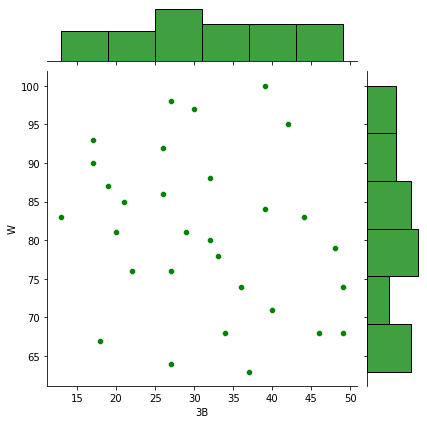

In [276]:
joint_plot(5)

<Figure size 432x288 with 0 Axes>

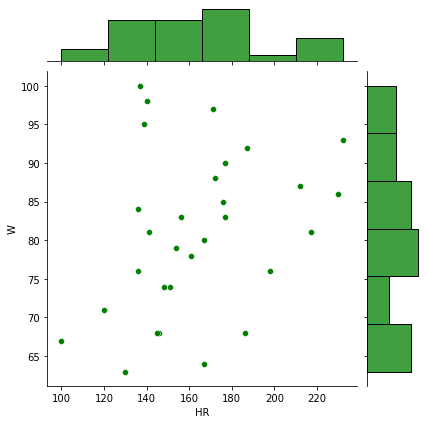

In [277]:
joint_plot(6)

<Figure size 432x288 with 0 Axes>

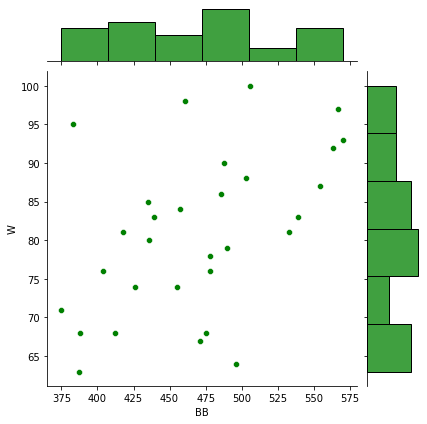

In [278]:
joint_plot(7)

<Figure size 432x288 with 0 Axes>

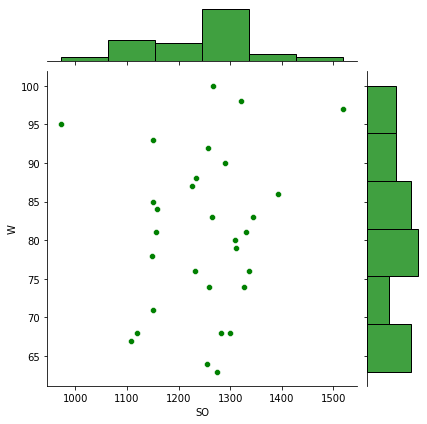

In [279]:
joint_plot(8)

<Figure size 432x288 with 0 Axes>

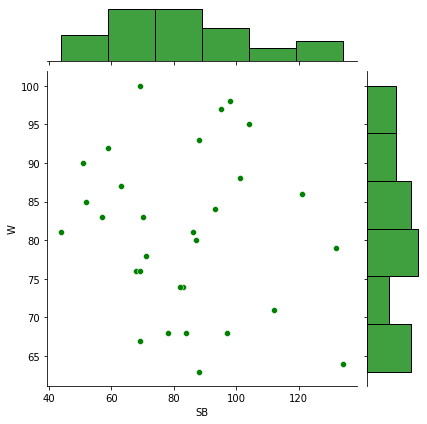

In [280]:
joint_plot(9)

<Figure size 432x288 with 0 Axes>

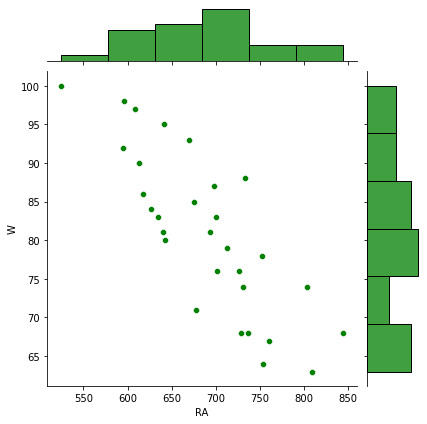

In [281]:
joint_plot(10)

<Figure size 432x288 with 0 Axes>

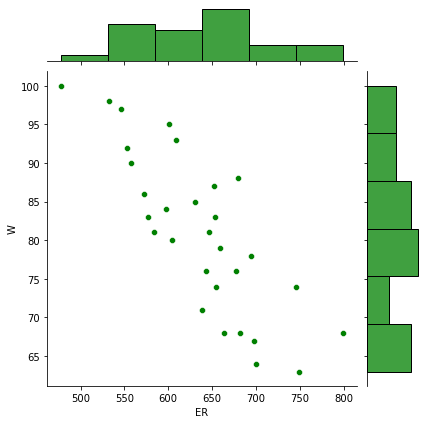

In [282]:
joint_plot(11)

<Figure size 432x288 with 0 Axes>

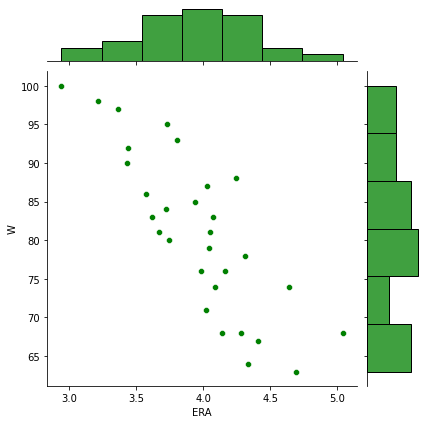

In [283]:
joint_plot(12)

<Figure size 432x288 with 0 Axes>

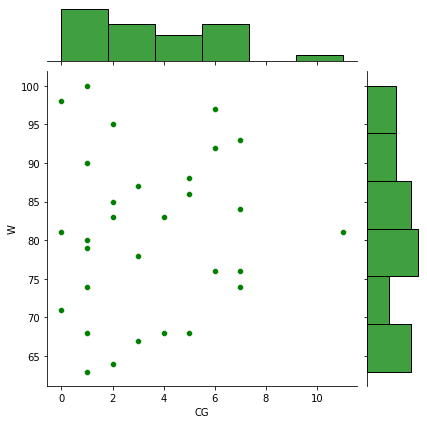

In [284]:
joint_plot(13)

<Figure size 432x288 with 0 Axes>

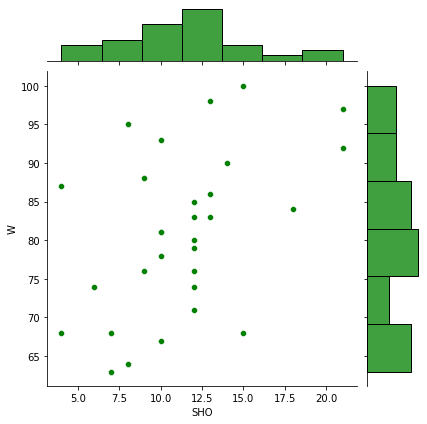

In [285]:
joint_plot(14)

<Figure size 432x288 with 0 Axes>

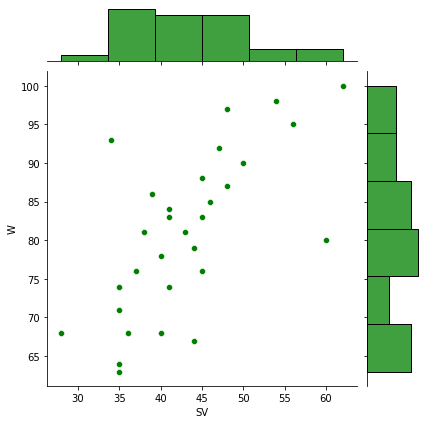

In [286]:
joint_plot(15)

<Figure size 432x288 with 0 Axes>

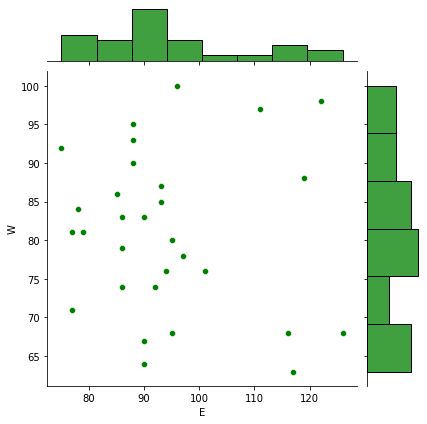

In [287]:
joint_plot(16)

In [64]:
columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [61]:
ncol=17
nrows=10

In [64]:

def dtp(a):
    plt.figure()
    sns.distplot(df[columns[a]],color='green',bins=5)

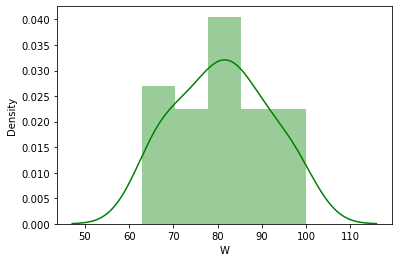

In [65]:
dtp(0)

normal distrinution of the dataset is being observed

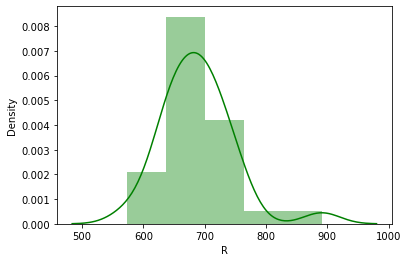

In [66]:
dtp(1)

The data looks right skewed.The building block is out of the normalised curve.

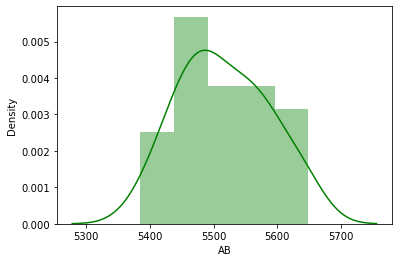

In [67]:
dtp(2)

normal distrinution of the dataset is being observed

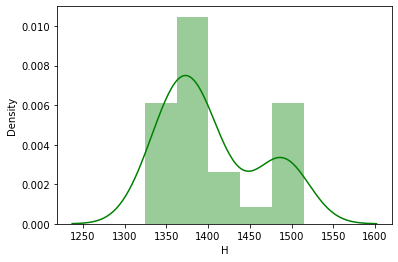

In [68]:
dtp(3)

The data looks right skewed.The building block is out of the normalised curve.

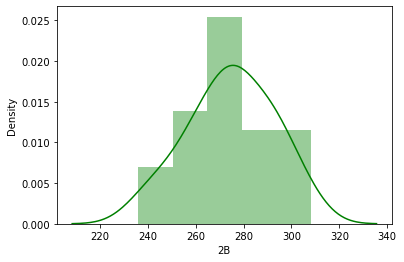

In [69]:
dtp(4)

normal distrinution of the dataset is being observed

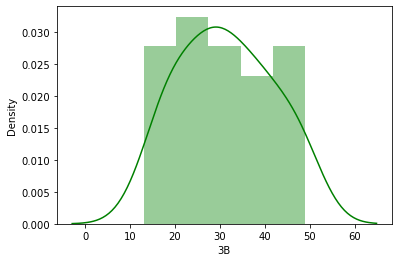

In [70]:
dtp(5)

normal distrinution of the dataset is being observed

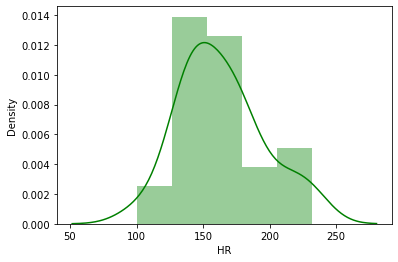

In [71]:
dtp(6)

we are able to observe low level skewness in   dataset 

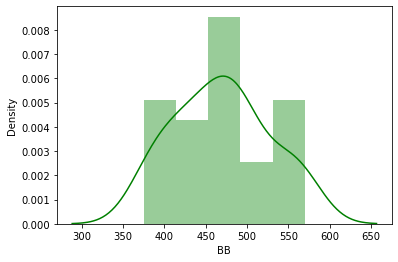

In [72]:
dtp(7)

normal distrinution of the dataset is being observed

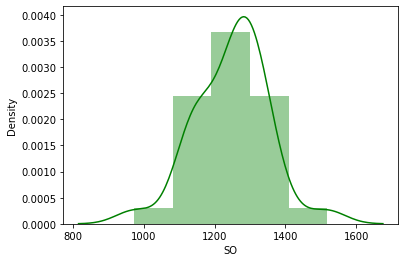

In [73]:
dtp(8)

normal distrinution of the dataset is being observed

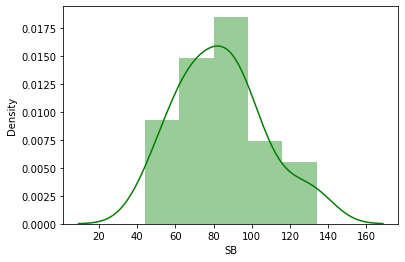

In [74]:
dtp(9)

normal distrinution of the dataset is being observed

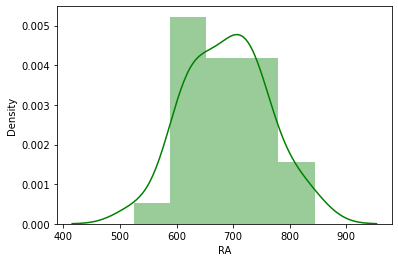

In [75]:
dtp(10)

normal distrinution of the dataset is being observed

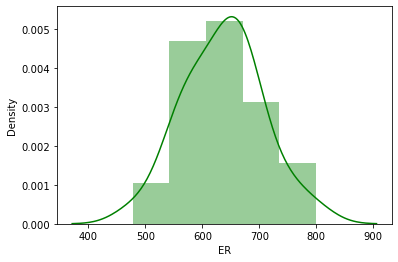

In [76]:
dtp(11)

normal distrinution of the dataset is being observed

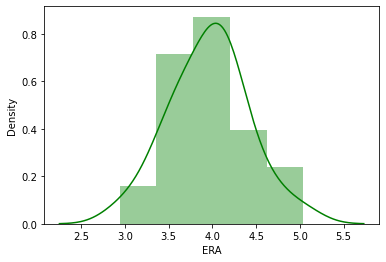

In [77]:
dtp(12)

normal distrinution of the dataset is being observed

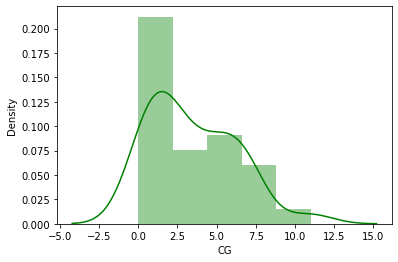

In [78]:
dtp(13)

The data looks right skewed.The building block is out of the normalised curve.

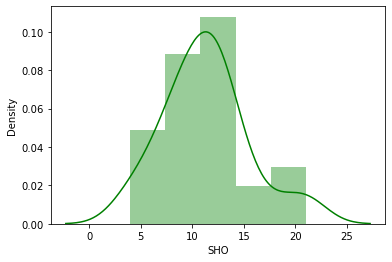

In [79]:
dtp(14)

we are able to observe low level skewness in   dataset 

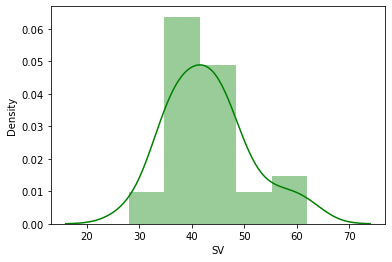

In [80]:
dtp(15)

we are able to observe low level skewness in   dataset 

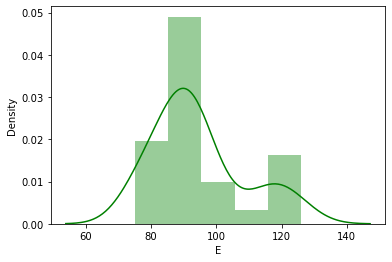

In [81]:
dtp(16)

The data looks right skewed.The building block is out of the normalised curve.

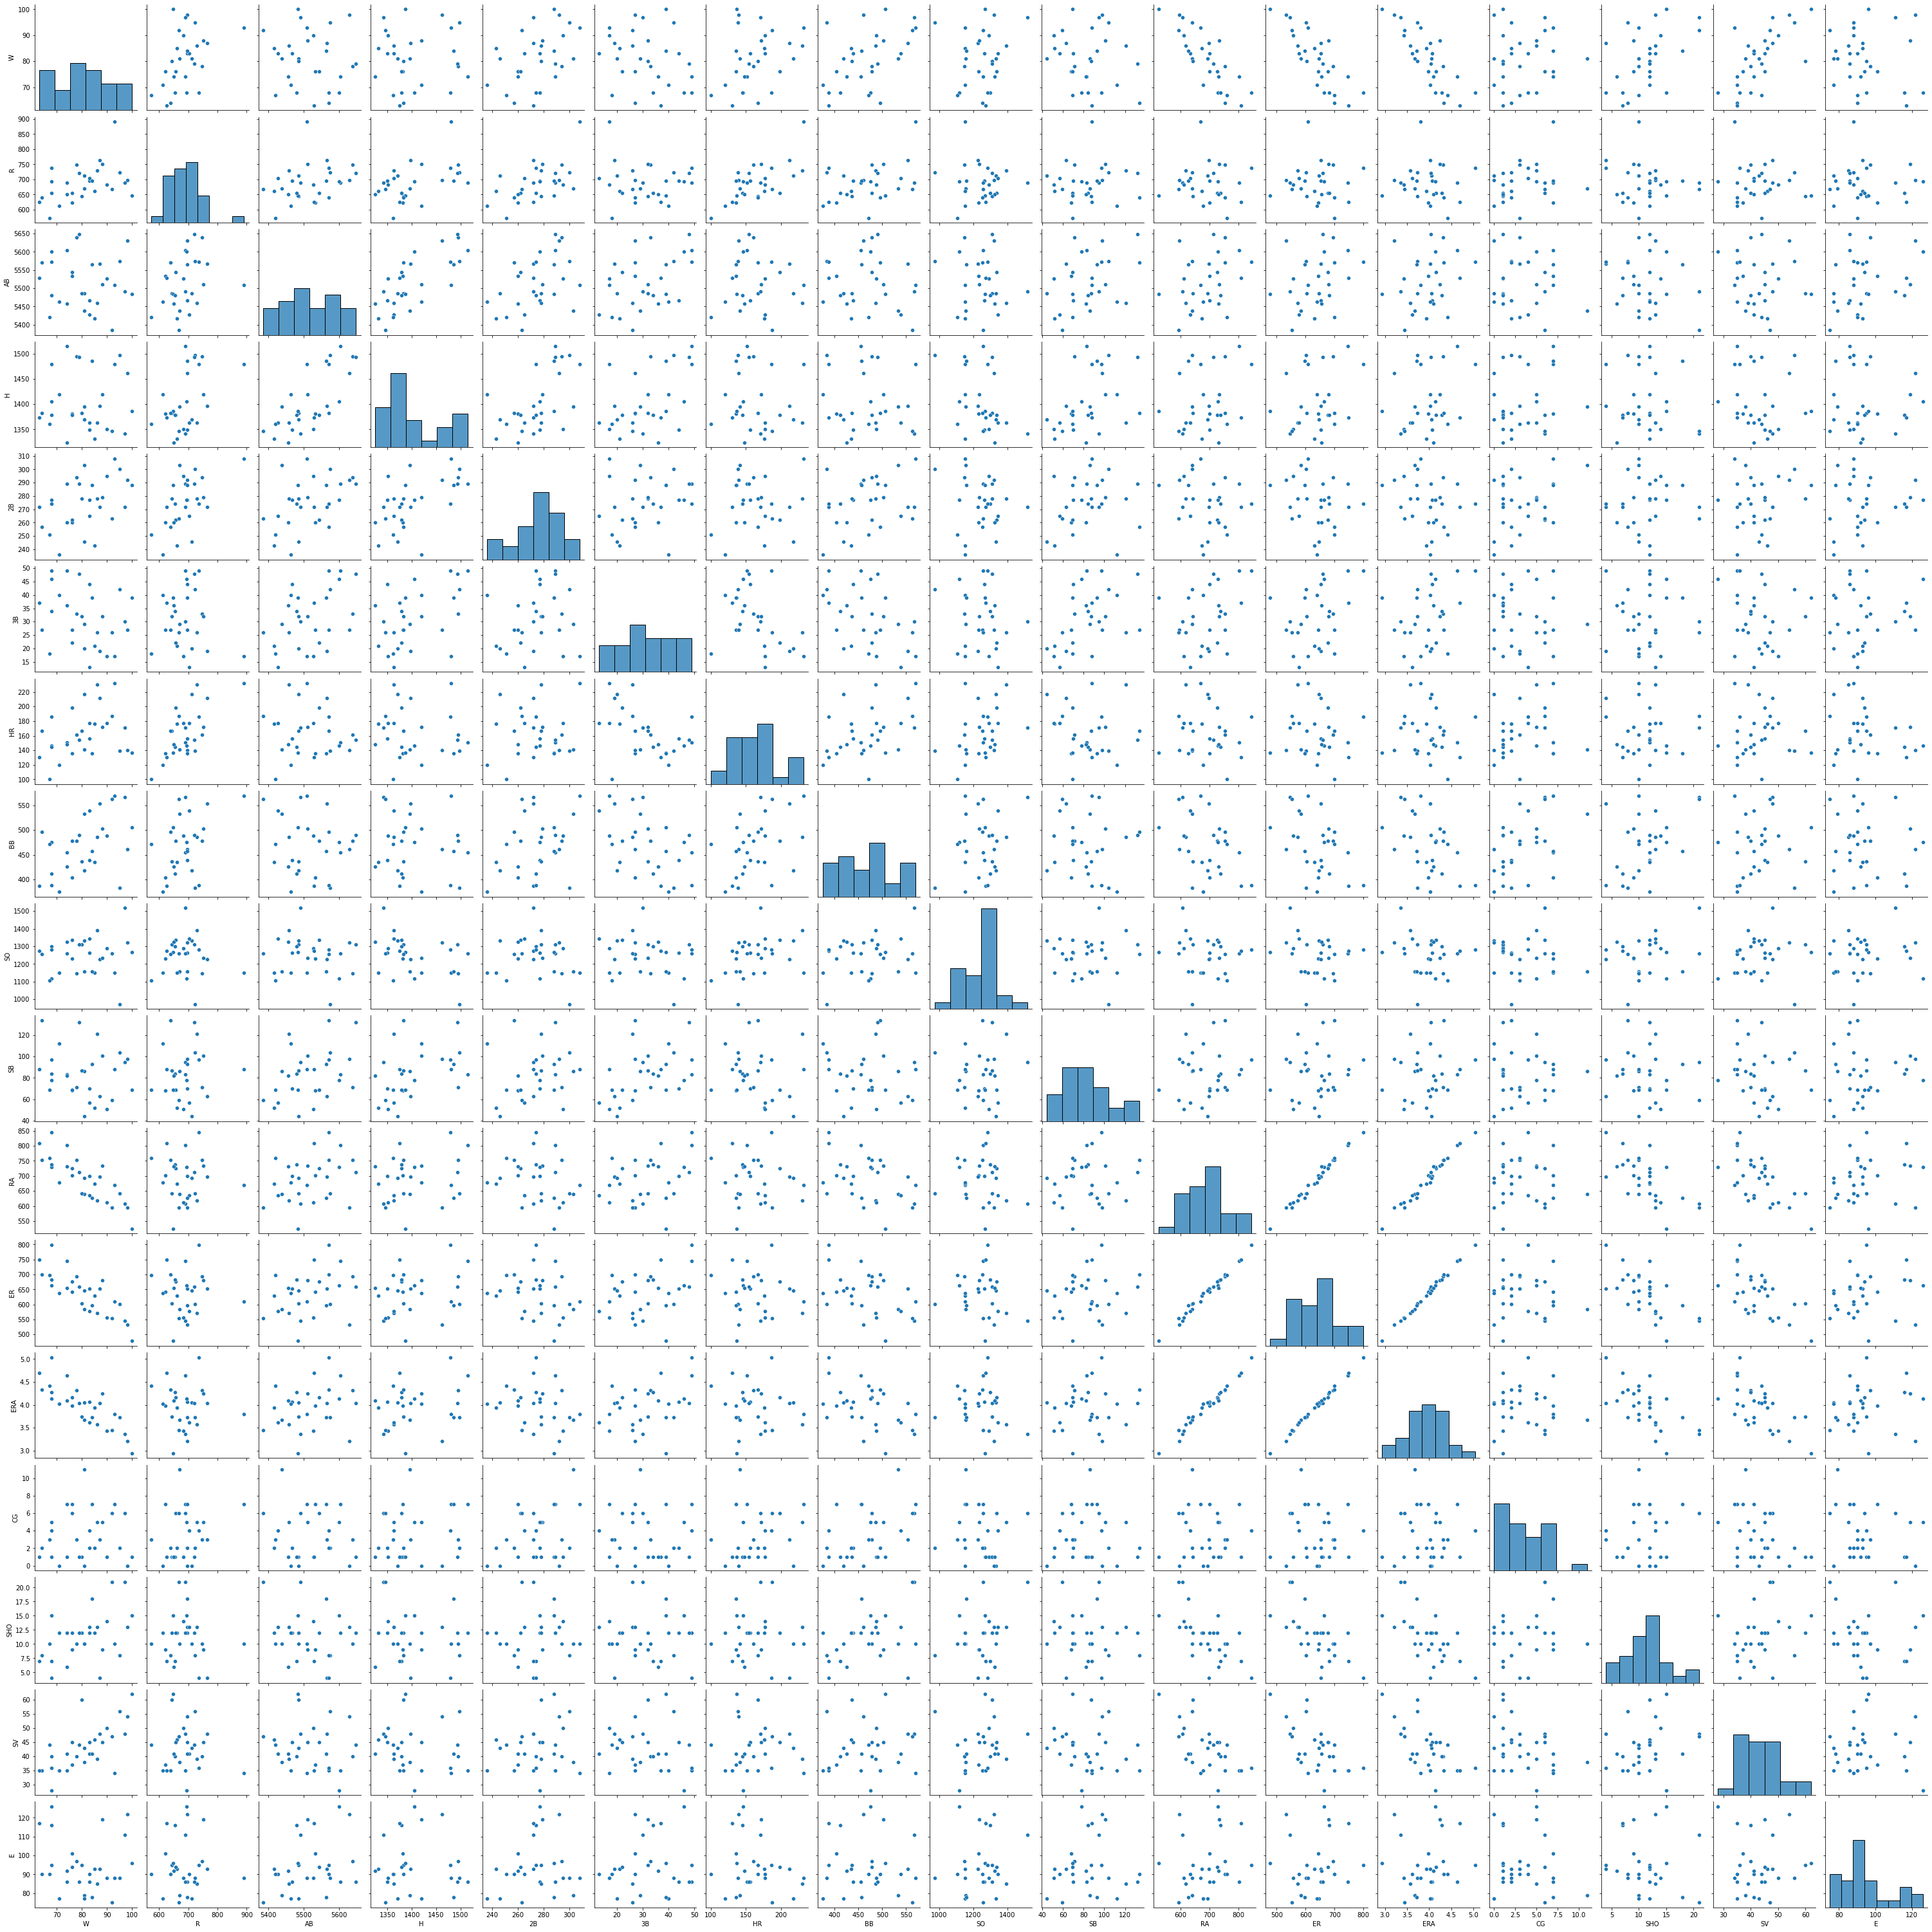

In [90]:

sns.pairplot(df)

# Detecting Outliers

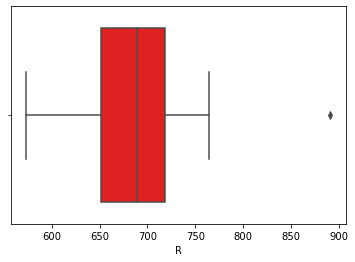

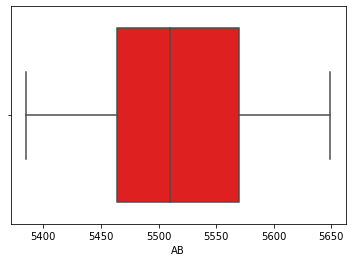

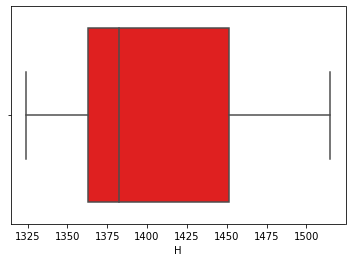

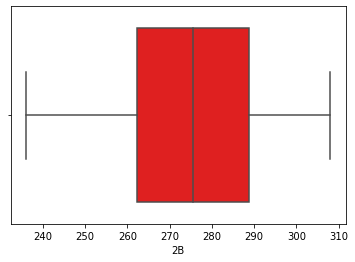

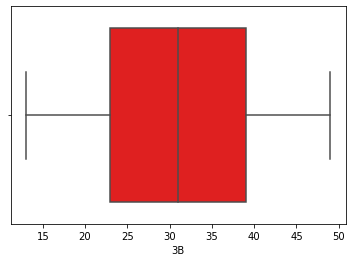

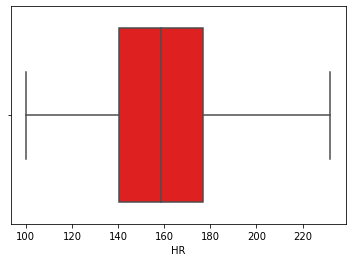

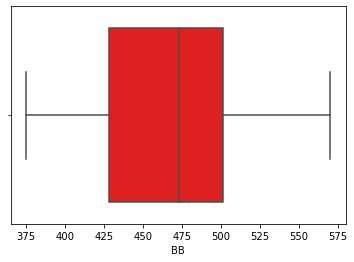

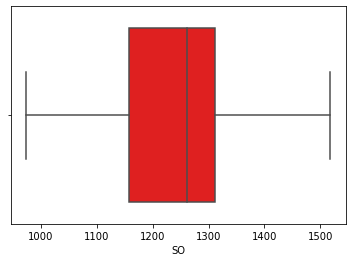

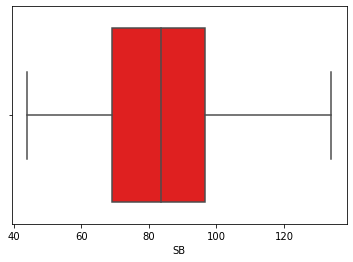

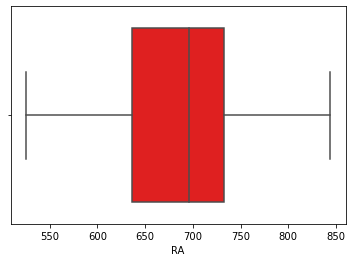

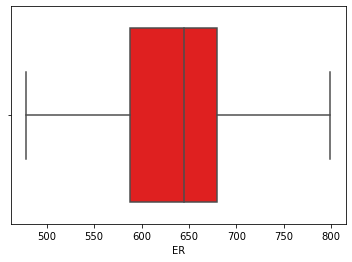

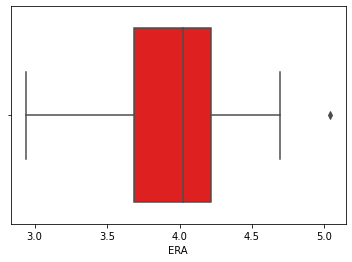

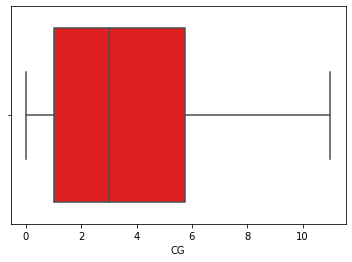

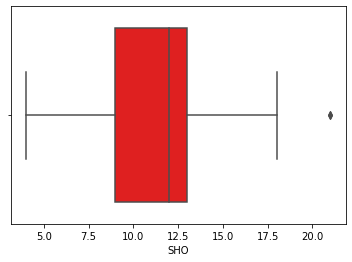

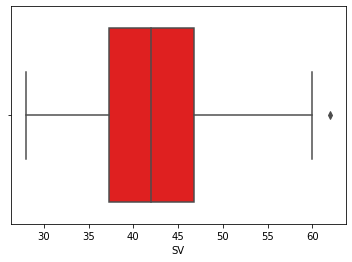

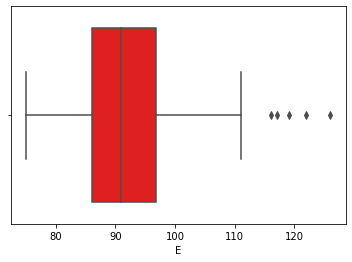

In [290]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],data=df,color='red')
    
for i in range(1,17):
    bxplt(i)

In [ ]:
we are able to see outliers in 

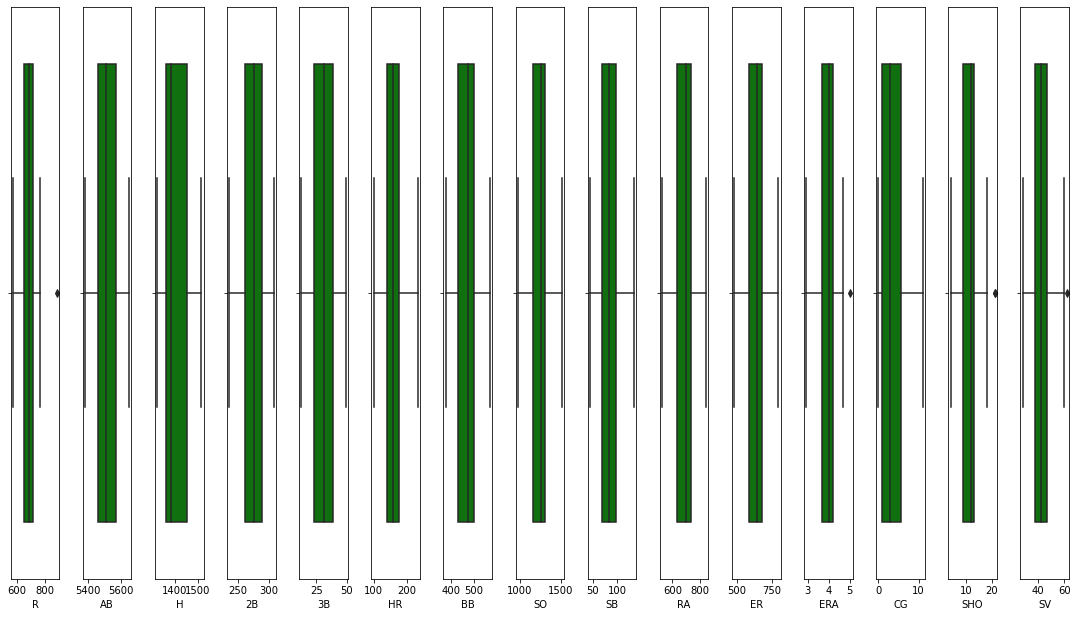

In [292]:
# to see outliers in a single visualization

plt.figure(figsize=(ncol,5*ncol))
for i in range(1,(len(columns)-1)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[columns[i]],color='green',orient='v')
    plt.tight_layout()

# Removing outliers

In [93]:
z=np.abs(zscore(df))
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [95]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [98]:
df_new1=df[(z<3).all(axis=1)]

In [99]:
#chcking data loss
data_loss=((df.shape[0]-df_new1.shape[0])/df.shape[0])*100
print(data_loss)

3.3333333333333335


since data loss is less than 5% it is allowable and we can go with it 

In [ ]:
#saving the upadated dataset 
df=df_new1

# Skewness Removal

In [100]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [101]:
#initialising x and y
X=df.drop(['W'],axis=1)
y=df.W

In [104]:
X.skew().sort_values(ascending=False)

R      1.200786
E      0.890132
CG     0.736845
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
RA     0.045734
SO    -0.156065
2B    -0.230650
dtype: float64

In [105]:
X['R']=PowerTransformer().fit_transform(X['R'].values.reshape(-1,1))
X['E']=PowerTransformer().fit_transform(X['E'].values.reshape(-1,1))
X['CG']=PowerTransformer().fit_transform(X['CG'].values.reshape(-1,1))
X['H']=PowerTransformer().fit_transform(X['H'].values.reshape(-1,1))
X['SV']=PowerTransformer().fit_transform(X['SV'].values.reshape(-1,1))
X['SHO']=PowerTransformer().fit_transform(X['SV'].values.reshape(-1,1))
X['HR']=PowerTransformer().fit_transform(X['HR'].values.reshape(-1,1))


In [106]:
X.skew().sort_values(ascending=False)

SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
E      0.063909
ER     0.058710
ERA    0.053331
RA     0.045734
SV     0.000836
H      0.000000
HR    -0.000065
SHO   -0.026307
R     -0.055006
CG    -0.059785
SO    -0.156065
2B    -0.230650
dtype: float64

we are able to reduce the skewness in the above columns ,lets move with the dataset

# Correlation Check

In [57]:
df_cor=df.corr()

In [58]:
df_cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


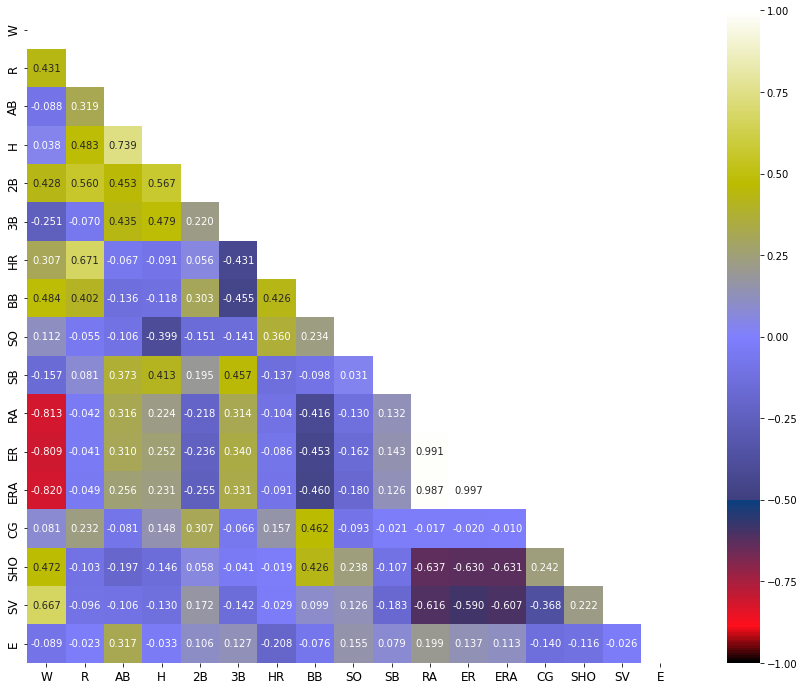

In [264]:
upper_triangle = np.triu(df_cor)
plt.figure(figsize=(17,12))
sns.heatmap(df_cor, vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [111]:
temp=X.columns

In [112]:
temp

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [109]:
#scaling the dataset 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [113]:
X=pd.DataFrame(X_scaled,columns=temp)

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns

In [119]:
vif


,vif,features
0,26.040902,R
1,13.819099,AB
2,8.796660,H
3,3.806338,2B
4,7.436861,3B
5,26.009671,HR
6,4.076925,BB
7,5.218801,SO
8,1.887737,SB
9,200.661648,RA


In [ ]:
SV,SHO,ERA,ER,RA,R,HR,AB,

We are able to see multicollinearity in SV,SHO,ERA,ER,RA,R,HR,AB in these columns let start removin these columns iterativeley.

In [121]:
X.drop('SV',axis=1,inplace=True)  #dropping   SV 

In [124]:
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

In [126]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,10.725833,R
1,13.068950,AB
2,7.325062,H
3,3.602099,2B
4,3.053536,3B
5,11.082134,HR
6,3.232129,BB
7,2.441842,SO
8,1.716266,SB
9,195.095736,RA


In [127]:
X.drop('ER',axis=1,inplace=True)  #dropping   ER 

In [128]:
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)


vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,8.426956,R
1,5.286647,AB
2,7.293600,H
3,3.370655,2B
4,2.877984,3B
5,8.114367,HR
6,3.215754,BB
7,2.370550,SO
8,1.615910,SB
9,125.020587,RA


In [129]:
X.drop('ERA',axis=1,inplace=True)  #dropping   ERA 

In [130]:
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)


vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,8.299648,R
1,3.837250,AB
2,6.168092,H
3,3.099423,2B
4,2.567008,3B
5,7.134813,HR
6,2.865294,BB
7,2.103575,SO
8,1.614527,SB
9,2.480549,RA


 vif is less than 10.    No multicollinearity now . Now we can fit the datas to model and check score

# Model Building

In [134]:
#X,y already initialized
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,E
0,0.728218,0.847731,1.538852,1.420173,1.041193,-0.764626,-1.534902,-2.697630,0.913883,-0.666234,-0.359844,1.539777,-0.334953
1,0.261212,-0.711094,-1.001568,0.127403,1.235809,-0.158581,-0.536592,0.154878,-0.601826,0.165971,-0.359844,0.364514,-0.532211
2,-0.244821,-1.115233,-0.037960,1.588795,-0.223808,-0.689676,1.139144,-0.893982,0.111449,-0.680339,1.993513,-0.604905,-1.342331
3,-1.285129,0.241522,-0.300762,-0.828122,-0.418423,-0.879049,-1.160536,-0.168602,-0.690985,0.180076,1.220103,-0.762909,0.678524
4,0.135622,1.280738,1.801654,0.801892,1.722347,-0.329850,-0.251360,0.105866,-0.022290,1.618803,1.220103,-1.096497,-0.532211


In [170]:
#finding best random_state

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.9744382579297093  on random_state  193


In [171]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=193)

In [172]:
#shapes of x and y (train,test)
x_train.shape

(22, 13)

In [173]:
#shape of test features
x_test.shape

(8, 13)

In [174]:
#shape of train features
y_train.shape

(22,)

In [175]:
#shape of test label
y_test.shape

(8,)

In [222]:
# different algorithm going to use

lr=LinearRegression()
ls=Lasso()
Rd=Ridge()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor(n_estimators=100)
adr=AdaBoostRegressor(n_estimators=100)
knn=KNeighborsRegressor()
gbr=GradientBoostingRegressor()

In [217]:
#code for Training and Prediction for linear,lasso,Ridge regression
def evaluate(x):
    mod=x
    mod.fit(x_train,y_train)
    pred_train=mod.predict(x_train)
    pred_test=mod.predict(x_test)
    

    print("r2_score for train data is {:.2f}%".format(r2_score(y_train,pred_train)*100),"\n")
    print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred_test)*100),"\n")
    print("intercept is : ",mod.intercept_,"\n")
    print("Coefficient is  : ",mod.coef_,"\n")
    print("Score of trained data :",mod.score(x_train,y_train)*100,"\n")
    print("Score of test data :",mod.score(x_test,y_test)*100,"\n")
    
    print("Error")
    print("mean absolute error is : ",mean_absolute_error(y_test,pred_test))
    print("mean squared error is: ",mean_squared_error(y_test,pred_test))
    print("root mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred_test)))
    plt.scatter(x=y_test,y=pred_test,color='r')
    plt.plot(y_test,y_test,color='b')

In [216]:
#code for Training and Prediction for other models

def eval(x):
    mod=x
    print(mod)
    #training the data
    mod.fit(x_train,y_train)
    #Predicting the data
    pred_train=mod.predict(x_train)
    pred=mod.predict(x_test)
    
    print("r2_score for train data is {:.2f}%".format(r2_score(y_train,pred_train)*100))
    print("\n")
    print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred)*100))
    
    print("\n")
    print("Error")
    print("mean absolute error : ",mean_absolute_error(y_test,pred))
    print("mean squared error : ",mean_squared_error(y_test,pred))
    print("mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred)))
    plt.scatter(x=y_test,y=pred,color='r')
    plt.plot(y_test,y_test,color='b')
    
   

r2_score for train data is 93.00% 

r2_score for  test data is  79.84% 

intercept is :  80.69153780976848 

Coefficient is  :  [ 7.66691091 -0.62467181 -1.3090658  -1.13983286 -0.87800863 -2.79753398
  0.07889136 -0.25582444  0.77263666 -5.58771223  0.65280236  4.14490479
  0.91031378] 

Score of trained data : 93.0034642306985 

Score of test data : 79.84483309871652 

Error
mean absolute error is :  3.5561669325327028
mean squared error is:  22.573786929437496
root mean squared error is:  4.751187949285684


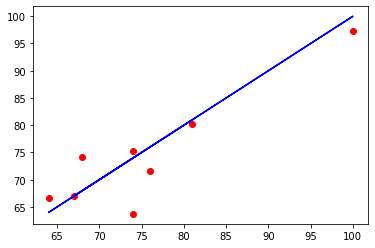

In [218]:
#calling Ridge model
evaluate(lr)

r2_score for train data is 92.14% 

r2_score for  test data is  81.18% 

intercept is :  80.84102351518817 

Coefficient is  :  [ 5.18736706 -0.98473022 -0.29888343 -0.34274355 -0.44067727 -1.08965567
  0.88362817 -0.57194973  0.64391748 -5.25228231  0.13236197  3.90058233
  1.14435268] 

Score of trained data : 92.13834831614807 

Score of test data : 81.18123685613114 

Error
mean absolute error is :  3.690413498170276
mean squared error is:  21.077014721133132
root mean squared error is:  4.590970999813997


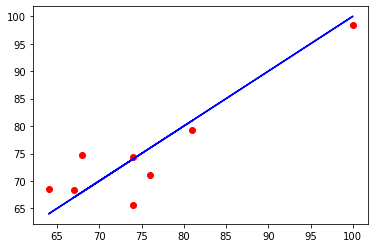

In [219]:
#calling Ridge model
evaluate(Rd)

r2_score for train data is 86.14% 

r2_score for  test data is  85.93% 

intercept is :  81.20314578732703 

Coefficient is  :  [ 3.40436152 -0.         -0.          0.         -0.          0.
  0.39431276  0.         -0.         -5.0342421   0.          2.89679561
  0.        ] 

Score of trained data : 86.13682998673951 

Score of test data : 85.931864520977 

Error
mean absolute error is :  3.357573658139909
mean squared error is:  15.756311736505745
root mean squared error is:  3.969422090998354


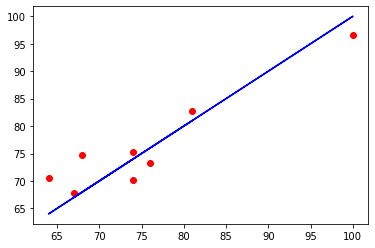

In [220]:
#calling Lasso model
evaluate(ls)

DecisionTreeRegressor()
r2_score for train data is 100.00%


r2_score for  test data is  22.32%


Error
mean absolute error :  8.25
mean squared error :  87.0
mean squared error is:  9.327379053088816


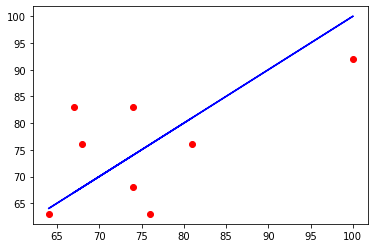

In [204]:
#calling DecisionTreeRegressor model
eval(dtr)

RandomForestRegressor()
r2_score for train data is 89.05%


r2_score for  test data is  44.39%


Error
mean absolute error :  6.484999999999999
mean squared error :  62.277925000000025
mean squared error is:  7.891636395577284


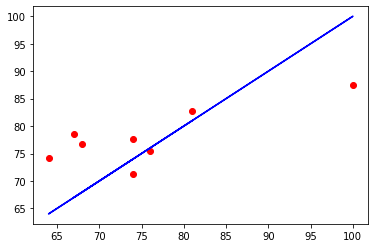

In [205]:
# RandomForestRegressor model
eval(rfr)

AdaBoostRegressor(n_estimators=100)
r2_score for train data is 99.11%


r2_score for  test data is  19.06%


Error
mean absolute error :  8.038541666666665
mean squared error :  90.65355034722218
mean squared error is:  9.521215801945788


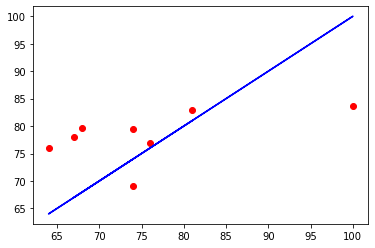

In [206]:
#calling AdaBoostRegressor model
eval(adr) 

KNeighborsRegressor()
r2_score for train data is 54.14%


r2_score for  test data is  43.11%


Error
mean absolute error :  6.450000000000003
mean squared error :  63.720000000000034
mean squared error is:  7.982480817390044


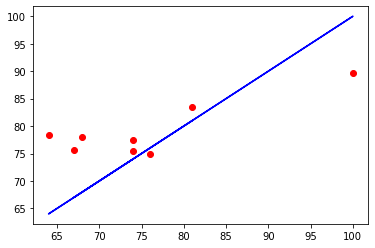

In [207]:
#calling KNeighborsRegressor model
eval(knn)

GradientBoostingRegressor()
r2_score for train data is 100.00%


r2_score for  test data is  46.28%


Error
mean absolute error :  6.3665550237273045
mean squared error :  60.17158730718001
mean squared error is:  7.757034698077611


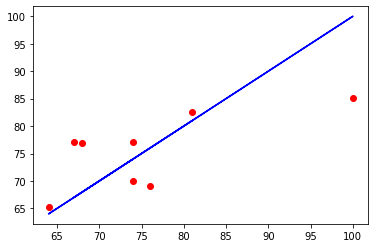

In [208]:
#calling GradientBoostingRegressor model
eval(gbr)

In [202]:
from numpy import absolute
model=[lr,dtr,rfr,adr,knn,gbr,ls,Rd]
for m in model:
    score=cross_val_score(m,X,y,cv=5,scoring="r2")
    print(m,"Cross val score is ",score*100)
    score=absolute(score)
    print("mean is ",score.mean()*100,"\n\n")

LinearRegression() Cross val score is  [ 38.69731218 -14.43815573  52.62749155  58.60833288  69.86061781]
mean is  46.84638202831651 


DecisionTreeRegressor() Cross val score is  [-257.01598579 -999.23664122  -43.25971059   -7.94348509   26.15384615]
mean is  266.72193376768286 


RandomForestRegressor() Cross val score is  [  27.73111901 -467.04167939   26.94451637   40.78725275   68.28747929]
mean is  126.15840936130994 


AdaBoostRegressor(n_estimators=100) Cross val score is  [  22.53582001 -578.22010178   25.55166286   18.63137368   56.66885541]
mean is  140.32156274867256 


KNeighborsRegressor() Cross val score is  [  24.9946714  -262.42748092  -26.19649657   36.72590267   58.31242604]
mean is  81.73139551924497 


GradientBoostingRegressor() Cross val score is  [  15.60807768 -908.98207877   22.08125155   40.99122215   59.71265098]
mean is  209.47505623003454 


Lasso() Cross val score is  [ 66.52564273 -27.38340501  61.67090343  68.16385784  91.54973002]
mean is  63.058707805

Ridge Regression is considered to be the best model with 81.18% ,and cross validation score of 59.155.The Ridge model has the least difference between the test and crossvalidationscore

In [199]:
Rd.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [244]:
#finding best alpha value using hypertuning method - GridSearchCV

from sklearn.model_selection import GridSearchCV
from numpy import arange
grid =  {'alpha':arange(0, 1, 0.01),
        'fit_intercept':[True,False],
         'max_iter':[1000,15000],
         'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs'],
         'positive':[True,False],
         'random_state':[int, 'RandomState instance',None]
        }


grid_search = GridSearchCV(Rd, grid, scoring='r2', cv=5, n_jobs=-1)



In [245]:
grid_search = hyper.fit(X, y)

In [246]:
grid_search.best_score_

0.47754748591042206

In [247]:
grid_search.best_params_

{'alpha': 0.99,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'random_state': int,
 'solver': 'lsqr'}

In [252]:
h_Rd=Ridge(alpha=0.99,fit_intercept=True,max_iter=1000,positive=False,random_state=int,solver='lsqr')

r2_score for train data is 92.15% 

r2_score for  test data is  81.20% 

intercept is :  80.83996493365414 

Coefficient is  :  [ 5.20136007 -0.98969214 -0.29950969 -0.34640558 -0.43800424 -1.09975729
  0.88146923 -0.56928892  0.64172047 -5.25094057  0.13633666  3.90762093
  1.14513048] 

Score of trained data : 92.14913476190499 

Score of test data : 81.20308670723287 

Error
mean absolute error is :  3.6870743837822637
mean squared error is:  21.0525428878992
root mean squared error is:  4.588305012518152


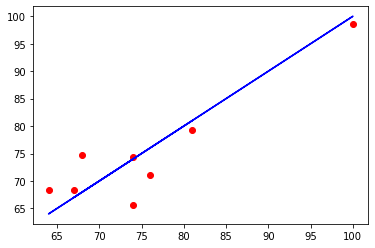

In [256]:
#calling hypertuned Ridge model
evaluate(h_Rd)

In [ ]:
with hypertuning the models accuracy is increasing from 81.18 to 81.20,the increase in the accuracy is low with hypertuning.
 So we will go with Ridge regression model  with hypertuning .

In [257]:
#saving the model
joblib.dump(h_Rd,"Baseball_Case_Study.obj")

['Baseball_Case_Study.obj']

In [259]:
#Lets Check loading the file 

No_of_predicted_wins=joblib.load("Baseball_Case_Study.obj")

In [260]:
#predicting 
No_of_predicted_wins.score(x_test,y_test)*100


81.20308670723287

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [262]:
pred=h_Rd.predict(x_test)
Conclusion=pd.DataFrame([No_of_predicted_wins.predict(x_test)[:],pred[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7
Predicted,79.216631,74.353471,68.280119,71.089676,98.500232,68.43585,74.778331,65.544637
Original,79.216631,74.353471,68.280119,71.089676,98.500232,68.43585,74.778331,65.544637


The datas predicted are perfectly matching. The jobfile created is working well and giving high accuracy.

After Training and Testing 8 algorithm model, The best accuracy model was determined as RidgeRegression with 81.20% true accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase